# PUBG绝地求生的获胜因素和获胜策略

数据来源：kaggle（PUBG官方API爬取）https://www.kaggle.com/c/pubg-finish-placement-prediction/data

<p>PUBG是由蓝洞开发并发行的一款射击游戏，大逃杀玩法是其红极一时的主要原因。在该游戏中,玩家从飞机上空降落到地图上的不同位置，从建筑物中寻找随机分布的武器、弹药、护甲和医疗用品，并向不断缩小的安全区内转移（安全区外会不断掉血）。在此过程中玩家需要保存自己、消灭对手，直到留下最后一个团队。

## 本篇为样本筛选和数据预处理
由于不同局比赛的人数和队伍数量不一，本课题通过matchId计算每局的总玩家人数，并筛选出总玩家在75到100的赛局

In [1]:
#导入包
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#导入数据
data = pd.read_csv('pubg.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

原始数据集中共有4446966条数据，28个维度。其中winPlacePerc是本课题的研究对象。

In [3]:
#检查各列是否存在缺失值
data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [4]:
#删去存在缺失值的行
data = data.dropna(axis="index",how='any',subset=['winPlacePerc'])

In [5]:
#计算每个玩家对应赛局的总玩家人数
data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')

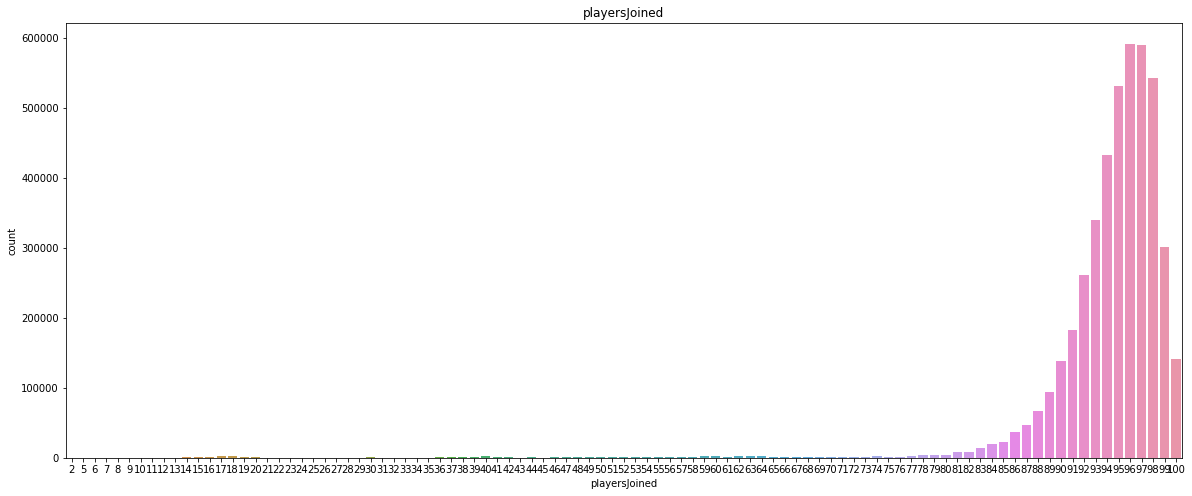

In [6]:
# 通过绘制图像，查看每局开始人数
# 通过seaborn下的countplot方法，可以直接绘制统计过数量之后的直方图
plt.figure(figsize=(20,8))
sns.countplot(data['playersJoined'])
plt.title('playersJoined')
plt.show()

In [7]:
# 取赛局总玩家在75到100的赛局
data = data[(data['playersJoined']>=75)]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4389644 entries, 0 to 4446965
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### 规范化部分特征值

In [9]:
# 规范化部分特征值，排除赛局人数不同带来的影响
# 使得每局水平都以100人局相当
#data['assists'] = data['assists']*((100/data['playersJoined']))
data['assists'] = data['assists']*((100-data['playersJoined'])/100 + 1)
data['headshotKills'] = data['headshotKills']*((100-data['playersJoined'])/100 + 1)
data['DBNOs'] = data['DBNOs']*((100-data['playersJoined'])/100 + 1)
data['kills'] = data['kills']*((100-data['playersJoined'])/100 + 1)
data['damageDealt'] = data['damageDealt']*((100-data['playersJoined'])/100 + 1)
data['matchDuration'] = data['matchDuration']*((100-data['playersJoined'])/100 + 1)
data['killStreaks'] = data['killStreaks']*((100-data['playersJoined'])/100 + 1)
data['roadKills'] = data['roadKills']*((100-data['playersJoined'])/100 + 1)
data['killPlace'] = data['killPlace']*((100-data['playersJoined'])/100 + 1)

### 清洗异常数据
- 有载具上击杀但没有载具移动距离

In [10]:
# 查看是否存在有载具上击杀但没有载具移动距离的数据
data['roadkillsWithoutMoving']=((data['roadKills']>0)&(data['rideDistance']==0))
data['roadkillsWithoutMoving'].describe()

count     4389644
unique          2
top         False
freq      4389458
Name: roadkillsWithoutMoving, dtype: object

In [11]:
# 删除有载具上击杀但没有载具移动距离的数据
data = data[data['roadkillsWithoutMoving'] == False]
data.shape

(4389458, 31)

- 有击杀但是没有移动

In [12]:
# 查看是否存在有击杀但是没有移动的数据
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']
data['killsWithoutMoving'] = ((data['kills']>0)&(data['totalDistance']==0))
data["killsWithoutMoving"].describe()

count     4389458
unique          2
top         False
freq      4389180
Name: killsWithoutMoving, dtype: object

In [13]:
#删除有击杀但是没有移动的数据
data = data[data['killsWithoutMoving'] == False]
data.shape

(4389180, 33)

- 有爆头击杀但没有获取武器

In [14]:
# 查看是否存在有爆头击杀但没有获取武器的数据
data['headshotWithoutWeapon']=((data['headshotKills']>0)&(data['weaponsAcquired']==0))
data['headshotWithoutWeapon'].describe()

count     4389180
unique          2
top         False
freq      4388328
Name: headshotWithoutWeapon, dtype: object

In [15]:
#删除存在有爆头击杀但没有获取武器的数据
data = data[data['headshotWithoutWeapon'] == False]
data.shape

(4388328, 34)

- 击杀人数少于爆头和载具击杀总和

In [16]:
# 查看是否存在有击杀人数少于爆头和载具击杀总和的数据
data['killsLessHeadshotPlusRoad'] = data['kills']<(data['headshotKills']+data['roadKills'])
data['killsLessHeadshotPlusRoad'].describe()

count     4388328
unique          2
top         False
freq      4388326
Name: killsLessHeadshotPlusRoad, dtype: object

In [17]:
#删除存在有击杀人数少于爆头和载具击杀总和的数据
data = data[data['killsLessHeadshotPlusRoad'] == False]
data.shape

(4388326, 35)

- 最远杀敌距离大于等于1.2km（枪械最远攻击距离）

In [18]:
data['longestKill'].describe()

count    4.388326e+06
mean     2.285019e+01
std      5.064537e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.116000e+01
max      1.094000e+03
Name: longestKill, dtype: float64

- 武器获取过多

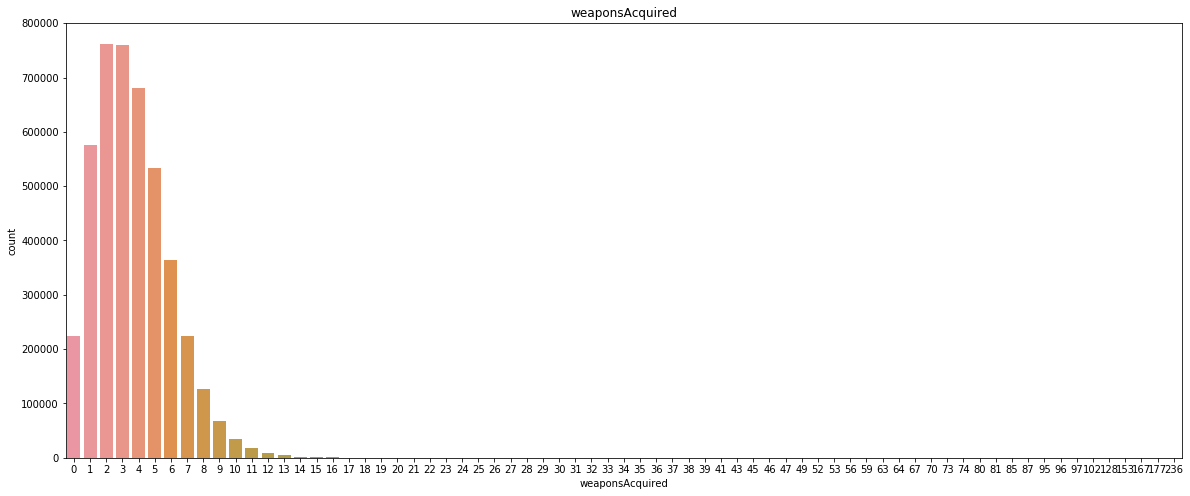

In [19]:
#查看武器获取情况
plt.figure(figsize=(20,8))
sns.countplot(data['weaponsAcquired'])
plt.title('weaponsAcquired')
plt.show()

每局75-100个玩家，考虑到枪械资源的稀缺性，删除枪械获取数量超过80的玩家

In [20]:
#删除武器获取异常的情况
data = data[data['weaponsAcquired'] <= 80]
data.shape

(4388313, 35)

### 特征工程
- headshot_rate 爆头率：用于衡量玩家射击技术

In [21]:
# 创建变量爆头率
data['headshot_rate'] = data['headshotKills'] / data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)
data['headshot_rate'].describe()

count    4.388313e+06
mean     1.029076e-01
std      2.603856e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: headshot_rate, dtype: float64

- kill_rate 击杀率：玩家遇敌后击杀敌方或仅仅造成伤害，同样衡量玩家的射击技术

In [22]:
#创建变量击杀率
#击杀率=击杀数/（击杀数+助攻数+击倒数）
#助攻：造成伤害但未击杀
data['kill_rate']=data.kills/(data.kills+data.assists+data.DBNOs)

- playersInGroup: 队伍人数

In [23]:
data['playersInGroup'] = data.groupby('groupId')['groupId'].transform('count')

- 移动距离与物资获取和击杀

In [24]:
#每移动一米获取的物资和击杀数
data['weaponsPerDistance'] = data['weaponsAcquired'] /data['totalDistance']

data['healsPerDistance'] = data['heals'] /data['walkDistance']

data['killsPerDistance'] = data['kills'] /data['walkDistance']

#每获取一个物资和一个击杀需要移动多远
data['distance_over_weapons'] = data['totalDistance'] / data['weaponsAcquired']

data['distance_over_heals'] = data['totalDistance'] / data['heals']

data['distance_over_kills'] = data['totalDistance'] / data['kills']

- healthitems: 防御性物资的获取总数

In [25]:
data['healthitems'] = data['heals'] + data['boosts']

- skill: 技巧击杀数量

In [26]:
data["skill"] = data["headshotKills"] + data["roadKills"] + data['killStreaks']

- NAN和INF值处理

In [28]:
import numpy as np
data[data == np.Inf] = np.NaN
data[data == np.NINF] = np.NaN
data.fillna(0,inplace=True)

### 导出初始样本集
<p>删除以下与本课题无关的维度：
<p>Id、groupId、matchId这三个ID与最终结果无关。（groupId保留至导出）
<p>killPoints、rankPoints、winPoints由于API原因，数据可能有误，因此在本课题中不使用。
<p>numGroups、maxPlace已通过计算特征化
<p>killsWithoutMoving,roadkillsWithoutMoving,headshotWithoutWeapon,killsLessHeadshotPlusRoad等维度仅用于判定异常值

In [29]:
column = ['Id','groupId','matchId','maxPlace','killPoints','rankPoints','winPoints','numGroups','playersJoined','killsWithoutMoving','roadkillsWithoutMoving','headshotWithoutWeapon','killsLessHeadshotPlusRoad']
data = data.drop(columns=column)
#检查各列是否存在缺失值
data.isna().sum()

assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPlacePerc             0
totalDistance            0
headshot_rate            0
kill_rate                0
playersInGroup           0
weaponsPerDistance       0
healsPerDistance         0
killsPerDistance         0
distance_over_weapons    0
distance_over_heals      0
distance_over_kills      0
healthitems              0
skill                    0
dtype: int64

In [30]:
#先存一个原始的样本集
data.to_csv('sample75-100.csv', index=False)

### 筛选出针对不同问题的数据集
<p>分别筛选出单排、双排、四排的数据集，并分开存储

In [1]:
#导入筛选比赛人数75-100人后的数据集，若重新运行可从这里开始
import pandas as pd
data = pd.read_csv('sample75-100.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4388313 entries, 0 to 4388312
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   assists                float64
 1   boosts                 int64  
 2   damageDealt            float64
 3   DBNOs                  float64
 4   headshotKills          float64
 5   heals                  int64  
 6   killPlace              float64
 7   kills                  float64
 8   killStreaks            float64
 9   longestKill            float64
 10  matchDuration          float64
 11  matchType              object 
 12  revives                int64  
 13  rideDistance           float64
 14  roadKills              float64
 15  swimDistance           float64
 16  teamKills              int64  
 17  vehicleDestroys        int64  
 18  walkDistance           float64
 19  weaponsAcquired        int64  
 20  winPlacePerc           float64
 21  totalDistance          float64
 22  headshot_rate     

In [2]:
data['matchType'].value_counts()

squad-fpp           1748572
duo-fpp              990743
squad                623393
solo-fpp             532307
duo                  311497
solo                 171797
crashfpp               5617
flaretpp               2389
normal-squad-fpp        939
flarefpp                533
normal-duo-fpp          254
crashtpp                173
normal-squad             99
Name: matchType, dtype: int64

<p>单排：solo, solo-fpp
<p>双排：duo, duo-fpp
<p>四排：squad, squad-fpp
<p>normal\crash\flare为其他比赛模式

#### 单排

In [3]:
data1 = data[(data['matchType']=='solo')|(data['matchType']=='solo-fpp')]
data1['matchType'].value_counts()

solo-fpp    532307
solo        171797
Name: matchType, dtype: int64

In [4]:
data1 = data1.drop(columns='matchType')
data1.shape

(704104, 32)

In [5]:
data1.to_csv('dataSolo_V2.csv', index=False)

#### 双排

In [6]:
data2 = data[(data['matchType']=='duo')|(data['matchType']=='duo-fpp')]
data2['matchType'].value_counts()

duo-fpp    990743
duo        311497
Name: matchType, dtype: int64

In [7]:
data2 = data2.drop(columns='matchType')
data2.shape

(1302240, 32)

In [8]:
data2.to_csv('dataDuo_V2.csv', index=False)

#### 四排

In [9]:
data3 = data[(data['matchType']=='squad')|(data['matchType']=='squad-fpp')]
data3['matchType'].value_counts()

squad-fpp    1748572
squad         623393
Name: matchType, dtype: int64

In [10]:
data3 = data3.drop(columns='matchType')
data3.shape

(2371965, 32)

In [11]:
data3.to_csv('dataSquad_V2.csv', index=False)